# Importing Libraries

In [3]:
import numpy as np
import pandas as pd 
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array, load_img
import matplotlib.pyplot as plt
from PIL import Image 
from glob import glob
import numpy as np 
import pandas as pd
import os
from tqdm import tqdm
import cv2
import time

In [4]:
train_path = 'train/'
test_path = 'test/'

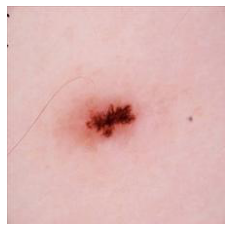

In [5]:
img = load_img(train_path + "Benign/1.jpg")
plt.imshow(img)
plt.axis("off")
plt.show()


# Data Loading and Pre-processing

In [6]:
images = ['Benign', 'Malignant']
code = {'Benign':0, 'Malignant':1}
def getcode(n) : 
    for x , y in code.items() : 
        if n == y : 
            return x  

In [7]:
x = img_to_array(img)
print(x.shape)

(224, 224, 3)


In [8]:
className = glob(train_path + '/*')
number_of_class = len(className)
print(number_of_class)

2


In [9]:
X_train = []
y_train = []
for folder in  os.listdir(train_path) : 
    
    for file in tqdm(os.listdir(os.path.join(train_path, folder))):
                
        # Get the path name of the image
        img_path = os.path.join(os.path.join(train_path, folder), file)

        # Open and resize the img
        image = cv2.imread(img_path)
        if image is not None:
            image_array = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                
        X_train.append(list(image_array))
        y_train.append(code[folder])
        

100%|████████████████████████████████████████████████████████████████████████████| 5590/5590 [00:04<00:00, 1326.05it/s]


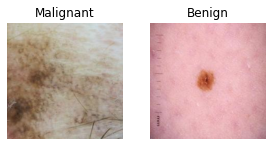

In [10]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_train),2))) : 
    plt.subplot(8,8,n+1)
    plt.imshow(X_train[i])   
    plt.axis('off')
    plt.title(getcode(y_train[i]))

# Cnn Model

In [11]:
model = Sequential()
model.add(Conv2D(32, (3 ,3), input_shape= x.shape))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3),))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3,3),))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(number_of_class))#output
model.add(Activation("softmax"))


In [12]:
model.compile(loss = "categorical_crossentropy",
             optimizer = "rmsprop",
             metrics = ["accuracy"])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 activation (Activation)     (None, 222, 222, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      9248      
                                                                 
 activation_1 (Activation)   (None, 109, 109, 32)      0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                    

In [14]:
batch_size = 32

# Data Augmentation

* rescale ----> rescaling factor. Defaults to None.
* shear_range ----> 'Shear' means that the image will be distorted along an axis, mostly to create or rectify the perception angles.
* horizontal_flip ----> Boolean. Randomly flip inputs horizontally.
* vertical_flip ----> Boolean. Randomly flip inputs vertically.
* zoom_range ----> Float or [lower, upper]. Range for random zoom

In [15]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                  shear_range = 0.3,
                  horizontal_flip=True,
                  vertical_flip=False,
                  zoom_range = 0.3
                  )
test_datagen  = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(train_path,
                                                    target_size=x.shape[:2],
                                                    batch_size = batch_size,
                                                    color_mode= "rgb",
                                                    class_mode = "categorical")
test_generator = test_datagen.flow_from_directory(test_path,
                                                    target_size=x.shape[:2],
                                                    batch_size = batch_size,
                                                    color_mode= "rgb",
                                                    class_mode = "categorical")

Found 11879 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


<ipython-input-20-ad853db9bc18>:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(generator = train_generator,


Epoch 1/5
50/50 [==============================] - 47s 941ms/step - loss: 0.5066 - accuracy: 0.7800 - val_loss: 0.4962 - val_accuracy: 0.7050
Epoch 2/5
50/50 [==============================] - 48s 962ms/step - loss: 0.4689 - accuracy: 0.7844 - val_loss: 0.7268 - val_accuracy: 0.6925
Epoch 3/5
50/50 [==============================] - 49s 984ms/step - loss: 0.4796 - accuracy: 0.7931 - val_loss: 0.5274 - val_accuracy: 0.7362
Epoch 4/5
50/50 [==============================] - 49s 975ms/step - loss: 0.4969 - accuracy: 0.7906 - val_loss: 0.4247 - val_accuracy: 0.8050
Epoch 5/5
50/50 [==============================] - 49s 982ms/step - loss: 0.4473 - accuracy: 0.8044 - val_loss: 0.4648 - val_accuracy: 0.7812
TIME TAKEN TO RUN 5 EPOCHS: 4.06452116171519


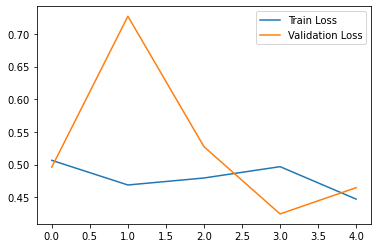

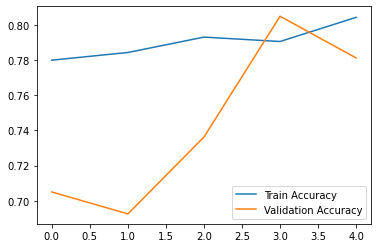

Epoch 1/10
50/50 [==============================] - 50s 987ms/step - loss: 0.5092 - accuracy: 0.7969 - val_loss: 0.5185 - val_accuracy: 0.6975
Epoch 2/10
50/50 [==============================] - 50s 992ms/step - loss: 0.4371 - accuracy: 0.8112 - val_loss: 0.4457 - val_accuracy: 0.7875
Epoch 3/10
50/50 [==============================] - 50s 1s/step - loss: 0.4525 - accuracy: 0.8025 - val_loss: 0.4163 - val_accuracy: 0.8000
Epoch 4/10
50/50 [==============================] - 51s 1s/step - loss: 0.4026 - accuracy: 0.8231 - val_loss: 0.5716 - val_accuracy: 0.6775
Epoch 5/10
50/50 [==============================] - 51s 1s/step - loss: 0.4412 - accuracy: 0.8025 - val_loss: 0.4546 - val_accuracy: 0.7700
Epoch 6/10
50/50 [==============================] - 50s 997ms/step - loss: 0.4307 - accuracy: 0.8057 - val_loss: 0.5559 - val_accuracy: 0.6975
Epoch 7/10
50/50 [==============================] - 51s 1s/step - loss: 0.4511 - accuracy: 0.7956 - val_loss: 0.4119 - val_accuracy: 0.8200
Epoch 8/10


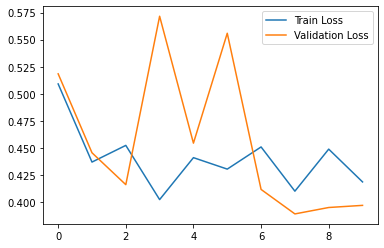

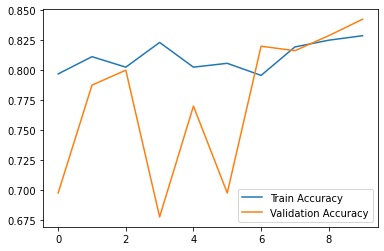

Epoch 1/15
50/50 [==============================] - 57s 1s/step - loss: 0.3950 - accuracy: 0.8188 - val_loss: 0.5590 - val_accuracy: 0.7163
Epoch 2/15
50/50 [==============================] - 54s 1s/step - loss: 0.4204 - accuracy: 0.8138 - val_loss: 0.4242 - val_accuracy: 0.8075
Epoch 3/15
50/50 [==============================] - 52s 1s/step - loss: 0.4207 - accuracy: 0.8133 - val_loss: 0.3809 - val_accuracy: 0.8650
Epoch 4/15
50/50 [==============================] - 52s 1s/step - loss: 0.3883 - accuracy: 0.8125 - val_loss: 0.4173 - val_accuracy: 0.8275
Epoch 5/15
50/50 [==============================] - 52s 1s/step - loss: 0.4213 - accuracy: 0.8050 - val_loss: 0.5129 - val_accuracy: 0.7725
Epoch 6/15
50/50 [==============================] - 51s 1s/step - loss: 0.3912 - accuracy: 0.8294 - val_loss: 0.4113 - val_accuracy: 0.8475
Epoch 7/15
50/50 [==============================] - 52s 1s/step - loss: 0.3393 - accuracy: 0.8481 - val_loss: 0.4328 - val_accuracy: 0.7950
Epoch 8/15
50/50 [==

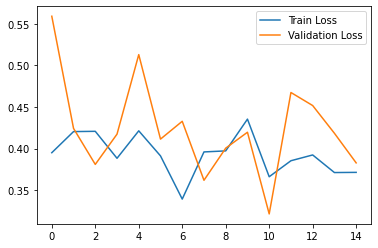

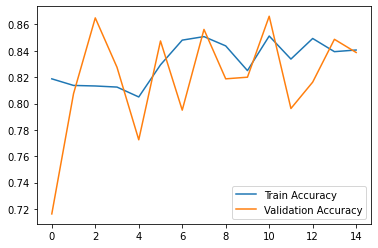

Epoch 1/20
50/50 [==============================] - 59s 1s/step - loss: 0.3766 - accuracy: 0.8294 - val_loss: 0.4820 - val_accuracy: 0.7850
Epoch 2/20
50/50 [==============================] - 67s 1s/step - loss: 0.4156 - accuracy: 0.8305 - val_loss: 0.4251 - val_accuracy: 0.7987
Epoch 3/20
50/50 [==============================] - 58s 1s/step - loss: 0.3558 - accuracy: 0.8469 - val_loss: 0.3502 - val_accuracy: 0.8712
Epoch 4/20
50/50 [==============================] - 61s 1s/step - loss: 0.3760 - accuracy: 0.8419 - val_loss: 0.5873 - val_accuracy: 0.7113
Epoch 5/20
50/50 [==============================] - 58s 1s/step - loss: 0.3728 - accuracy: 0.8394 - val_loss: 0.3997 - val_accuracy: 0.8300
Epoch 6/20
50/50 [==============================] - 58s 1s/step - loss: 0.3625 - accuracy: 0.8481 - val_loss: 0.4624 - val_accuracy: 0.7975
Epoch 7/20
50/50 [==============================] - 58s 1s/step - loss: 0.3932 - accuracy: 0.8368 - val_loss: 0.3300 - val_accuracy: 0.8687
Epoch 8/20
50/50 [==

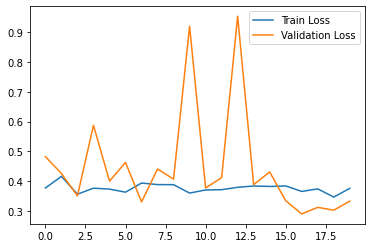

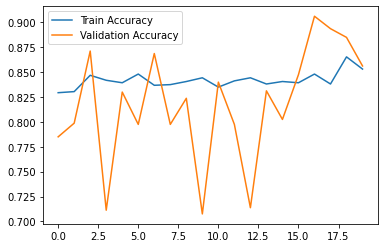

In [20]:
for ep in range(5,25,5):
    
    start = time.time()
    hist = model.fit_generator(generator = train_generator, 
                   steps_per_epoch = 1600 // batch_size,
                   epochs = ep,
                   validation_data = test_generator,
                   validation_steps = 800 // batch_size)
    print('TIME TAKEN TO RUN',ep,'EPOCHS:',(time.time()-start)/60)
    plt.plot(hist.history["loss"], label = "Train Loss")
    plt.plot(hist.history["val_loss"], label = "Validation Loss")
    plt.legend()
    plt.show()
    plt.plot(hist.history["accuracy"], label = "Train Accuracy")
    plt.plot(hist.history["val_accuracy"], label = "Validation Accuracy")
    plt.legend()
    plt.show()

In [16]:
start = time.time()
hist = model.fit_generator(generator = train_generator, 
                   steps_per_epoch = 1600 // batch_size,
                   epochs = 5,
                   validation_data = test_generator,
                   validation_steps = 800 // batch_size)
print('TIME TAKEN TO RUN',5,'EPOCHS:',(time.time()-start)/60)

<ipython-input-16-d0e0beb648ff>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(generator = train_generator,


Epoch 1/5
50/50 [==============================] - 49s 956ms/step - loss: 1.5105 - accuracy: 0.6025 - val_loss: 0.6766 - val_accuracy: 0.5312
Epoch 2/5
50/50 [==============================] - 48s 960ms/step - loss: 0.6395 - accuracy: 0.6675 - val_loss: 0.9091 - val_accuracy: 0.5275
Epoch 3/5
50/50 [==============================] - 48s 965ms/step - loss: 0.7860 - accuracy: 0.6756 - val_loss: 0.6349 - val_accuracy: 0.5713
Epoch 4/5
50/50 [==============================] - 49s 976ms/step - loss: 0.5536 - accuracy: 0.7300 - val_loss: 0.6546 - val_accuracy: 0.6037
Epoch 5/5
50/50 [==============================] - 49s 982ms/step - loss: 0.5140 - accuracy: 0.7600 - val_loss: 0.5894 - val_accuracy: 0.6725
TIME TAKEN TO RUN 5 EPOCHS: 4.068741794427236


In [17]:
print(hist.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


# Train-Validation Loss

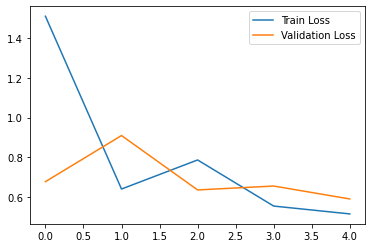

In [18]:
plt.plot(hist.history["loss"], label = "Train Loss")
plt.plot(hist.history["val_loss"], label = "Validation Loss")
plt.legend()
plt.show()

# Train-Validation Accuracy

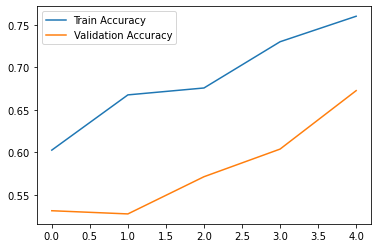

In [19]:
plt.plot(hist.history["accuracy"], label = "Train Accuracy")
plt.plot(hist.history["val_accuracy"], label = "Validation Accuracy")
plt.legend()
plt.show()